In [1]:
from __future__ import print_function
from __future__ import unicode_literals
import pynini
import re
from string import punctuation, ascii_letters

In [2]:
output_alphabet = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine","ten", 
                   "eleven", "twelve", "thirteen", "fourteen", "fifteen", "sixteen", "seventeen",
                   "eighteen", "nineteen", 
                   "twenty", "thirty", "forty", "fifty", "sixty", "seventy", "eighty","ninty", 
                   "hundred"]

input_alphabet = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
eps = '<eps>'

# HW2
## fst: Number-name generator

You will build a finite-state transducer that takes a number between 0 and 999 and turn it into words. For example, it will take 123 and produce "one hundred twenty three". Note that you will need to create a new symbol table for the output, which will contain words like "one" and "hundred". For the input, just use the ascii.syms.txt symbol table.

In [3]:

input_table = pynini.SymbolTable("input")
input_table.add_symbol(eps, key=0)
for index, value in enumerate(input_alphabet):
    input_table.add_symbol(value, key=index+1)
    


output_table = pynini.SymbolTable("output")
output_table.add_symbol(eps, key=0)
for index, value in enumerate(output_alphabet):
    output_table.add_symbol(value, key=index+1)

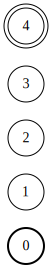

In [4]:
num2name = pynini.Fst()
num2name.set_input_symbols(input_table)
num2name.set_output_symbols(output_table)
num2name.add_state()
num2name.add_state() 
num2name.add_state() 
num2name.add_state() 
num2name.add_state() 
num2name.set_final(4)
num2name.set_start(0)

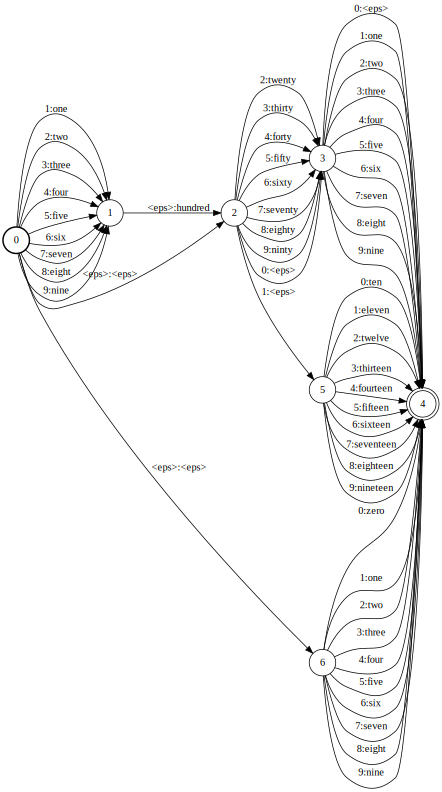

In [5]:
# [1-9]00
for index, value in enumerate(output_alphabet[1:10]):
    num2name.add_arc(0, pynini.Arc(input_table.find(str(index+1)), output_table.find(value), 0, 1))
# sepcial for word "hundred"
num2name.add_arc(1, pynini.Arc(input_table.find(eps), output_table.find("hundred"), 0, 2))

# [0-9][20-99]
num2name.add_state()
for index, value in enumerate(output_alphabet[20:28]):
    num2name.add_arc(2, pynini.Arc(input_table.find(str(index + 2)), output_table.find(value), 0, 3))
num2name.add_arc(3, pynini.Arc(input_table.find("0"), output_table.find(eps), 0, 4))
for index, value in enumerate(output_alphabet[1:10]):
    num2name.add_arc(3, pynini.Arc(input_table.find(str(index + 1)), output_table.find(value), 0, 4))

# [1-9][10-19]
num2name.add_arc(2, pynini.Arc(input_table.find("1"), output_table.find(eps), 0, 5))
for index, value in enumerate(output_alphabet[10:20]):
    num2name.add_arc(5, pynini.Arc(input_table.find(str(index)), output_table.find(value), 0, 4))

# [1-9]0[0-9]
num2name.add_arc(2, pynini.Arc(input_table.find("0"), output_table.find(eps), 0, 3))


num2name.add_state()
for index, value in enumerate(output_alphabet[:10]):
    num2name.add_arc(6, pynini.Arc(input_table.find(str(index)), output_table.find(value), 0, 4))


num2name.add_arc(0, pynini.Arc(input_table.find(eps), output_table.find(eps), 0, 2))
num2name.add_arc(0, pynini.Arc(input_table.find(eps), output_table.find(eps), 0, 6))

In [23]:
def build_transducer(number, table):
    fst = pynini.Fst()
    fst.set_input_symbols(table)
    fst.set_output_symbols(table)
    fst.add_state()
    fst.set_start(0)
    previous_state = 0
    
    for i in str(number):
        current_state = fst.add_state()
        fst.add_arc(previous_state, pynini.Arc(table.find(i), table.find(i), 0, current_state))
        previous_state = current_state
    fst.set_final(current_state)
    return fst

build_transducer(030, input_table)
str(030)

'24'

In [7]:
num = build_transducer(0, input_table)
name = pynini.compose(num, num2name)
name.rmepsilon()
name.stringify(token_type=output_table)

u'zero'

In [8]:
num = build_transducer(9, input_table)
name = pynini.compose(num, num2name)
name.rmepsilon()
name.stringify(token_type=output_table)

u'nine'

In [9]:
num = build_transducer(19, input_table)
name = pynini.compose(num, num2name)
name.rmepsilon()
name.stringify(token_type=output_table)

u'<eps> nineteen'

In [10]:
num = build_transducer(209, input_table)
name = pynini.compose(num, num2name)
name.rmepsilon()
name.stringify(token_type=output_table)

u'two hundred <eps> nine'

In [11]:
num = build_transducer(219, input_table)
name = pynini.compose(num, num2name)
name.rmepsilon()
name.stringify(token_type=output_table)

u'two hundred <eps> nineteen'

In [12]:
num = build_transducer(229, input_table)
name = pynini.compose(num, num2name)
name.rmepsilon()
name.stringify(token_type=output_table)

u'two hundred twenty nine'

In [21]:
num = build_transducer(034, input_table)
name = pynini.compose(num, num2name)
name.rmepsilon()
name.stringify(token_type=output_table)

u'twenty eight'

<span style="color:red">Self Comments:</span>